<a href="https://colab.research.google.com/github/simonc999/Bioinformatics_python_project/blob/main/python_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ES PYTHON**


# Initialize variables classes and import packages

### imports

In [1]:
!pip install rich
import pandas as pd
import requests
import re
import regex
import matplotlib.pyplot as plt
from builtins import print

### Fetching classes (Gene, transcriptVariant, toolkit)

In [2]:
class toolkit:

    def __init__(self, name):
        self.name = name

    def readFASTA(self, file_path): # the output will be a FASTA as we see on ncbi
        if file_path.startswith('http'):
            response = requests.get(file_path)
            if response.status_code == 200:
                file_contents = response.text
            else:
                raise Exception(f"Error in downloading FASTA file. Status Code: {response.status_code}")
        else:
            with open(file_path, 'r') as file:
                file_contents = file.read()

        lines = file_contents.splitlines()
        modified_lines = [lines[0]] + [line.replace(' ', '') for line in lines[1:]] # let unmodified the first line and erase all the blank spaces from the second to the end
        result_string = '\n'.join(modified_lines) # join all the lines separated by \n
        return result_string

    def extractSequenceFromFASTA(self, fasta_string):
        lines = fasta_string.splitlines()  # separate the FASTA txt in lines
        sequence_lines = [line.strip() for line in lines[0:] if line.strip() and not line.startswith('>')] # line.strip() removes all the blank spaces excluding the line starting with ">" (the first)
        full_sequence = ''.join(sequence_lines) # join all the sequences
        return full_sequence

    def reverseComplement(self,sequence):
        complement_dict = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}    # indicates the corrispondence of the nucleotide
        reverse_comp = ''.join(complement_dict[base] for base in reversed(sequence)) # applies the substitution in reverse to make reverse complement
        print(reverse_comp)

    def find_reps(self,sequence,number):
        repetitions = {'A': [], 'C': [], 'G': [], 'T': []}

        for base in repetitions.keys():  # finds {number} or more repetitions for each nucleotide
            matches = re.finditer(rf"({base}){{{number},}}", sequence)

            for match in matches:
                repeat_length = len(match.group(0))
                repetitions[base].append(repeat_length) # save the length found in a list
        # graphic content for the histograms
        colors = {'A': 'red', 'C': 'blue', 'G': 'green', 'T': 'orange'} # create a dictionary for the colors

        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()

        for idx, base in enumerate(repetitions.keys()):
            lengths = repetitions[base]
            ax = axes[idx]

            if lengths:
                ax.hist(lengths, bins=range(number, max(lengths) + 2), alpha=0.7, color=colors[base]) # set the minimum of the x axe to the length setted with the {number} parameter
                ax.set_title(f'Repetitions of {base} (Total: {len(lengths)})', color=colors[base])
                ax.set_xlabel('Repetitions length')
                ax.set_ylabel('Frequency')
                ax.grid(True, linestyle='--', alpha=0.7)
            else:
                ax.set_title(f'Repetitions of {base} (Not found)', color=colors[base])
                ax.set_xlabel('Repetitions length')
                ax.set_ylabel('Frequency')
                ax.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()
    def polymerase(sequence): # using a dictionary for the genetic code
          code = {
              "TTT": "F", "TTC": "F", "TTA": "L", "TTG": "L",
              "TCT": "S", "TCC": "S", "TCA": "S", "TCG": "S",
              "TAT": "Y", "TAC": "Y", "TAA": "*", "TAG": "*",
              "TGT": "C", "TGC": "C", "TGA": "*", "TGG": "W",
              "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
              "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
              "CAT": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
              "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R",
              "ATT": "I", "ATC": "I", "ATA": "I", "ATG": "M",
              "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
              "AAT": "N", "AAC": "N", "AAA": "K", "AAG": "K",
              "AGT": "S", "AGC": "S", "AGA": "R", "AGG": "R",
              "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V",
              "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",
              "GAT": "D", "GAC": "D", "GAA": "E", "GAG": "E",
              "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G",
          }

          protein = ""
          for i in range(0, len(sequence), 3):
              codone = sequence[i:i+3]
              aminoacido = code.get(codone, "X")  # "X" if unrecognised
              protein += aminoacido

          return protein






class TranscriptVariant:
    def __init__(self, variant_id, sequence):
        self.variant_id = variant_id
        self.sequence = sequence
        self.exons = []
        self.cds = None
        self.protein = None

    def setSequence(self, sequence):
        self.sequence = sequence

    def setExon(self, exon_sequence):
        self.exons.append((exon_sequence, len(self.exons) + 1))

    def setCDS(self, cds_sequence):
        self.cds = cds_sequence

    def setProtein(self, protein_sequence):
        self.protein = protein_sequence

    def __str__(self):
        output = f"\nTranscript Variant: {self.variant_id}\n"
        if self.sequence:
            output += f"(Length: {len(self.sequence)}): {self.sequence}\n"
        else:
            output += "No trancript sequence available.\n"
        # exons information
        output += "Exons:\n"
        if self.exons:
            for idx, (seq, num) in enumerate(self.exons, start=1):
                output += f"  Exon {num} (Length: {len(seq)}): {seq}\n"
        else:
            output += "  No exons available.\n"

        # CDS information
        output += "CDS:\n"
        if self.protein:
            output += f"  CDS Sequence (Length: {len(self.cds)}): {self.cds}\n"
        else:
            output += "  No CDS sequence available.\n"

        # protein sequence information
        output += "Protein:\n"
        if self.protein:
            output += f"  Protein Sequence (Length: {len(self.protein)}): {self.protein}\n"
        else:
            output += "  No protein sequence available.\n"

        return output


class Gene:
    def __init__(self, name, input_sequence):
        self.name = name
        self.sequence = input_sequence
        self.transcript_variants = []

    def setSequence(self, sequence):
        self.sequence = sequence

    def addTranscriptVariant(self, variant_id,sequence):
        variant = TranscriptVariant(variant_id,sequence)
        self.transcript_variants.append(variant)
        return variant

    def getTranscriptVariant(self, variant_id):
        for variant in self.transcript_variants:
            if variant.variant_id == variant_id:
                return variant
        return None

    def __str__(self):
        output = f"--------------------------------------------\nGene Name: {self.name}\n"
        output += f"Full Gene Sequence (Length: {len(self.sequence) if self.sequence else 'N/A'}):\n"
        if self.sequence:
            output += f"(Length: {len(self.sequence)}): {self.sequence}\n"
        else:
            output += "No gene sequence available.\n"

        # Transcript Variants Information
        output += "\nTranscript Variants:\n"
        if self.transcript_variants:
            for variant in self.transcript_variants:
                output += str(variant)
        else:
            output += "No transcript variants available.\n"

        return output
    def GCamount(self):
        cont_GC = self.sequence.count('G') + self.sequence.count('C')
        print("GC amount for the gene " + self.name + ": " + str(round(cont_GC * 100 / len(self.sequence),3)) + "%")

    def get_exon_intron_indices(self):
      transcript_indices = {}

      for variant in self.transcript_variants:
          combined_indices = []
          current_position = 0
          exon_indices = []

          # Check for the first intron if the first exon does not start at index 0
          if variant.exons and variant.exons[0][0] != self.sequence[:len(variant.exons[0][0])]:
              end_index = self.sequence.find(variant.exons[0][0]) - 1
              if end_index >= 0:  # Ensure end is not negative
                  combined_indices.append(("intron", 0, end_index))

          for exon_seq in variant.exons:
              start_index = self.sequence.find(exon_seq[0], current_position)
              if start_index == -1:
                  print(f"[red]Error: exon {exon_seq[1]} in {variant.variant_id} sequence: {exon_seq[0]} not found in the variant sequence.[/red]")
                  continue

              end_index = start_index + len(exon_seq[0]) - 1
              if end_index >= start_index:  # Ensure end is greater than or equal to start
                  exon_indices.append((start_index, end_index))
              current_position = end_index

          # Add exons to combined_indices
          combined_indices.extend([("exon", start, end) for start, end in exon_indices if end >= start])

          # Add introns between exons
          combined_indices.extend(
              [("intron", exon_indices[i - 1][1] + 1, exon_indices[i][0] - 1)
              for i in range(1, len(exon_indices))
              if exon_indices[i - 1][1] + 1 <= exon_indices[i][0] - 1]
          )

          transcript_indices[variant.variant_id] = combined_indices

      return transcript_indices



    def print_transcript_info(self):
        from builtins import print
        gene_length = len(self.sequence)
        print("Gene " + self.name +": Length = " + str(gene_length))
        for variant in self.transcript_variants:
            start_index = self.sequence.find(variant.sequence)
            if start_index != -1:
                end_index = start_index + len(variant.sequence) - 1
            else:
                start_index = -1
                end_index = -1

            # transcript informations
            if start_index == -1 and end_index == -1:
                from rich import print
                print(f"[green]-- " +str(variant.variant_id) + " start index = " + str(start_index) +" end index = " +str(end_index) +" [/green]") # in the eucaryotes case is correct that a trascript sequence can't be found
                from builtins import print
            else:
                print(f"-- {variant.variant_id} start index = {start_index} end index = {end_index}")

            # exons informations
            for exon_num, (exon_seq, _) in enumerate(variant.exons, start=1):
                exon_start = self.sequence.find(exon_seq)
                if exon_start != -1:
                    exon_end = exon_start + len(exon_seq) - 1
                    exon_length = len(exon_seq)
                else:
                    exon_start = -1
                    exon_end = -1
                    exon_length = 0

                if exon_start == -1 and exon_end == -1:
                  from rich import print
                  print(f"[red]  - exon {exon_num} start index = {exon_start} end index = {exon_end}[/red]")
                  from builtins import print
                else:
                  print(f"  - exon {exon_num} start index = {exon_start} end index = {exon_end}")

    def print_exon_intron_flanks_with_indices(self):
        for variant in self.transcript_variants:
            print(f"\nTranscript Variant: {variant.variant_id}")
            for exon_num, (exon_seq, _) in enumerate(variant.exons, start=1): #ignore the second element of the tuple _
                exon_start = self.sequence.find(exon_seq)
                exon_end = exon_start + len(exon_seq) - 1

                if exon_start != -1:
                    print(f"  Exon {exon_num} (start: {exon_start}, end: {exon_end})")
                    if exon_start > 0: #exon preceded by an intron
                        if exon_start - 2 >= 0:
                            intron_flank_end = self.sequence[exon_start - 2:exon_start] #append the start and 2 positions before the start !!! exon start is excluded
                            print(f"    Last 2 nucleotides of intron: {intron_flank_end} INDEX {exon_start - 2}-{exon_start - 1}")

                        exon_flank_start = self.sequence[exon_start:exon_start + 2] # frist two nucleotides of exon
                        print(f"    First 2 nucleotides of exon: {exon_flank_start} INDEX {exon_start}-{exon_start + 1}")
                    else: # exon_start == 0
                        print(f"  Exon {exon_num} is at the start of the gene sequence, no intron before.")

                    if exon_end + 1 < len(self.sequence): #exon followed by an intron
                        exon_flank_end = self.sequence[exon_end - 1:exon_end+1]
                        print(f"    Last 2 nucleotides of exon: {exon_flank_end} INDEX {exon_end - 1}-{exon_end}")

                        intron_flank_start = self.sequence[exon_end + 1:exon_end + 3]
                        print(f"    First 2 nucleotides of intron: {intron_flank_start} INDEX {exon_end + 1}-{exon_end + 2}")
                    else:
                        print(f"  Exon {exon_num} is at the end of the gene sequence, no intron after.")
                else:
                    print(f"  Exon {exon_num} not found in gene sequence.")




### Fetching toolkit


In [3]:
toolkit1 = toolkit("toolkit")

## Fetching NANOG
## https://www.ncbi.nlm.nih.gov/nuccore/NC_000012.12?from=7789402&to=7799146&report=genbank
## Code to add sequence, transcripts, exons, CDSs and proteins

In [4]:
NANOG = Gene("NANOG",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/full_gene.fasta")))

NANOG.addTranscriptVariant("v1",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1.fasta")))
NANOG.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_e1.fasta")))
NANOG.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_e2.fasta")))
NANOG.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_e3.fasta")))
NANOG.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_e4.fasta")))
NANOG.getTranscriptVariant("v1").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_CDS.fasta")))
NANOG.getTranscriptVariant("v1").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v1_P.txt")))

NANOG.addTranscriptVariant("v2",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2.fasta")))
NANOG.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_e1.fasta")))
NANOG.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_e2.fasta")))
NANOG.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_e3.fasta")))
NANOG.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_e4.fasta")))
NANOG.getTranscriptVariant("v2").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_CDS.fasta")))
NANOG.getTranscriptVariant("v2").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/NANOG/v2_P.txt")))

## Fetching POU5F1
## https://www.ncbi.nlm.nih.gov/nuccore/NC_000006.12?from=31164337&to=31170682&report=genbank&strand=true
## Code to add sequence, transcripts, exons, CDSs and proteins

In [5]:
POU5F1 = Gene("POU5F1",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/full_gene.fasta")))

POU5F1.addTranscriptVariant("v1",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1.fasta")))
POU5F1.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_e1.fasta")))
POU5F1.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_e2.fasta")))
POU5F1.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_e3.fasta")))
POU5F1.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_e4.fasta")))
POU5F1.getTranscriptVariant("v1").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_e5.fasta")))
POU5F1.getTranscriptVariant("v1").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_CDS.fasta")))
POU5F1.getTranscriptVariant("v1").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v1_P.txt")))

POU5F1.addTranscriptVariant("v2",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2.fasta")))
POU5F1.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_e1.fasta")))
POU5F1.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_e2.fasta")))
POU5F1.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_e3.fasta")))
POU5F1.getTranscriptVariant("v2").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_e4.fasta")))
POU5F1.getTranscriptVariant("v2").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_CDS.fasta")))
POU5F1.getTranscriptVariant("v2").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v2_P.txt")))

POU5F1.addTranscriptVariant("v3",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3.fasta")))
POU5F1.getTranscriptVariant("v3").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_e1.fasta")))
POU5F1.getTranscriptVariant("v3").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_e2.fasta")))
POU5F1.getTranscriptVariant("v3").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_e3.fasta")))
POU5F1.getTranscriptVariant("v3").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_e4.fasta")))
POU5F1.getTranscriptVariant("v3").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_e5.fasta")))
POU5F1.getTranscriptVariant("v3").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_CDS.fasta")))
POU5F1.getTranscriptVariant("v3").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v3_P.txt")))

POU5F1.addTranscriptVariant("v4",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4.fasta")))
POU5F1.getTranscriptVariant("v4").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4_e1.fasta")))
POU5F1.getTranscriptVariant("v4").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4_e2.fasta")))
POU5F1.getTranscriptVariant("v4").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4_e3.fasta")))
POU5F1.getTranscriptVariant("v4").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4_CDS.fasta")))
POU5F1.getTranscriptVariant("v4").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v4_P.txt")))

POU5F1.addTranscriptVariant("v5",toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5.fasta")))
POU5F1.getTranscriptVariant("v5").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_e1.fasta")))
POU5F1.getTranscriptVariant("v5").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_e2.fasta")))
POU5F1.getTranscriptVariant("v5").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_e3.fasta")))
POU5F1.getTranscriptVariant("v5").setExon(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_e4.fasta")))
POU5F1.getTranscriptVariant("v5").setCDS(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_CDS.fasta")))
POU5F1.getTranscriptVariant("v5").setProtein(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/eukaryotes/POU5F1/v5_P.txt")))

## Create dictionary of genes

In [6]:
gene_dictionary = {"NANOG": NANOG, "POU5F1": POU5F1}

# 1 - Gene NANOG and POU5F1

### 1- Printing gene informations

In [7]:
for gene in gene_dictionary.values():
    print(gene)

--------------------------------------------
Gene Name: NANOG
Full Gene Sequence (Length: 9745):
(Length: 9745): ATAAATCTAGAGACTCCAGGATTTTAACGTTCTGCTGGACTGAGCTGGTTGCCTCATGTTATTATGCAGGCAACTCACTTTATCCCAATTTCTTGATACTTTTCCTTCTGGAGGTCCTATTTCTCTAACATCTTCCAGAAAAGTCTTAAAGCTGCCTTAACCTTTTTTCCAGTCCACCTCTTAAATTTTTTCCTCCTCTTCCTCTATACTAACATGAGTGTGGATCCAGCTTGTCCCCAAAGCTTGCCTTGCTTTGAAGCATCCGACTGTAAAGAATCTTCACCTATGCCTGTGATTTGTGGGCCTGAAGAAAACTATCCATCCTTGCAAATGTCTTCTGCTGAGATGCCTCACACGGAGACTGGTAAGAAAGAAATTTATCCTTGAAAGGCCAAGTTCCTTAAGGGAAAAGAGAGAAGGAGAGAGGGTTAAGGGATCATTTCCCTCTTGAGCAATGATGGACCATTACTATAAAGAAGTGTTATTATCAACTAATCCTCTGGAAACCCCTTTTTCCATTATAACTTGGTGGCACCTGCCCTTTGAACTATGTCCCAGGTCTCAGGAGTGTGCATTGAGTTGAAGGACACAGAATTCGGCAGTTGAACAGTGTGCAGTAAGTTTGAGAACCTATGGGCTTAGGCATGGTGGAAACAAAAATGTATCGTTATAGTTAAATGAAGGTGATGTGTACATCTTCACATAGTGCTGGACACATGTGAATAAATAGCAGATTTATTGCTAATTAGCCAGAAGACCTAACGTCATAGCTCAGGGATGAGCATGATTTTGTTTTGCCAAAAATGGCATGGCAAATCACGATGAGATTTCTGTAATACATAATTTGGGTAATTCTTTCTATGTCAGTAACGGCTGTCTCTTCTCCA

### 2- GC CONTENUTE
Un DNA ricco in GC gode di una maggiore flessibilità strutturale, che biologicamente si traduce in una maggiore resistenza allo stress torsionale prodotto durante i processi trascrizionali.

In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    gene.GCamount()

------NANOG
GC amount for the gene NANOG: 43.735%
------POU5F1
GC amount for the gene POU5F1: 51.292%


### 3- Verify with regular expression CDS validity

In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    for variant in gene.transcript_variants:
                  cds = variant.cds
                  m = re.search(r"^(ATG)(?!(TAA|TGA|TAG))([ATCG]{3}(?!(TAA|TGA|TAG)))*[ATCG]{3}(TAA|TGA|TAG)$", cds)
                  #               ^(ATG)                                                                              starts with ATG
                  #                     (?!(TAA|TGA|TAG))                                                             the previous must NOT be followed by one of these three patterns that represents stop codons
                  #                                      ([ATCG]{3}(?!(TAA|TGA|TAG)))*                                searching for (*)  at least one or no triplet [ATCG]{3} NOT followed by one of the three stop codons
                  #                                                                   [ATCG]{3}(TAA|TGA|TAG)$         searching for one more triplet and the end triplet that must be one of the three stop codons
                  m1 = re.search(r"^(CTG|TTG)(?!(TAA|TGA|TAG))([ATCG]{3}(?!(TAA|TGA|TAG)))*[ATCG]{3}(TAA|TGA|TAG)$",cds)
                  if m:
                    print(f"CDS for variant " + variant.variant_id + " is valid.")
                  elif m1:
                    print(f"CDS for variant " + variant.variant_id + " is valid with an alternative start codon (" + m1.group(1) + ").")
                  else:
                    print(f"CDS for variant " + variant.variant_id + " is invalid.")

------NANOG
CDS for variant v1 is valid.
CDS for variant v2 is valid.
------POU5F1
CDS for variant v1 is valid.
CDS for variant v2 is valid with an alternative start codon (CTG).
CDS for variant v3 is valid with an alternative start codon (CTG).
CDS for variant v4 is valid.
CDS for variant v5 is valid.


The reason why the variants 2 and 3 of POU5F1 are not recognised as a valid CDS is due to the start codon: in fact both CDSs presents a start codon "CGT" that is a initiator codon (like "TTG"). So we can add a condition in searching both "ATG" and "CGT"

### 4- Find if longer transcripts match longer proteins


In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    for variant in gene.transcript_variants:
        if variant.protein and variant.sequence:
              print("VARIANT " + variant.variant_id + " length: " + str(len(variant.sequence)) + " PROTEIN length: " + str(len(variant.protein)))

------NANOG
VARIANT v1 length: 5182 PROTEIN length: 305
VARIANT v2 length: 2049 PROTEIN length: 289
------POU5F1
VARIANT v1 length: 1409 PROTEIN length: 360
VARIANT v2 length: 2065 PROTEIN length: 190
VARIANT v3 length: 1579 PROTEIN length: 190
VARIANT v4 length: 2290 PROTEIN length: 164
VARIANT v5 length: 2075 PROTEIN length: 265


### 5- Reverse complement

In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    toolkit1.reverseComplement(gene.sequence)

------NANOG
TAAAATTCTCAAGCACACTTTATTCAAGGACCACAGAGTTTACACCAACTACCCAGAAGCCAGGAATAGCTTAAGGAGAGACTCACCACCAGCAGCTTCTTTTCAATCAAGTTTCACTTCAACCTCACACCCAGGAACCCATTCAAATTCCTACATTTCGGTATCCTTAGTCGAACTAACTTCCTGTGCCGGAAGCTTTTGTCTGTCCCAGTGACTTCTTTCTTTAACAAATTCCCTTCATCTCCCCCTTGAGTCAAAGCCCATGGGGGCCCCAGGAGGCATGCAATATTTACCAAGGGCTCTCCCCCACTTTCCTGCCTCTGTCTGGCAGTTGTTTGCCTTTACTTTTAGGTTTGTAGTCACAGCCTGTATTTTTTCCTGTAGACACACCAGGTTTTCTGAACGGTAGAATTACTCAGAGTAGAATTAACCTTGTCCTTCACCCCGAGAACTGAGCTTGAAATTCACTAATCAAGGCCTGTATTCCTCCCACTTCTGAGTTTTAAATTTATATTATGAAATTCGGAAAACCCAGGCAAATTCAATCCATGCTTCTCTCCTTCAGGTACAAACTGAAATGAAAATGAAAGCTGAGAAATCAAAATAATGAATTTTAAAAACTAAAATATGGTAAAGCTACTAAAATATAGCATTGGAAGTAACACACACCTCCTTTTGGGAAAAGAAAGGAAAATTTTCTAGAGAAAGGAAGAAATGTTAAACAGAGAGCCTTGTACTATCCTTTTTGCCTAATCTCCTATTATTTTTGTTTATTTTTGAGACAGTGACGCTCTGTCGCCCAGGCTGGAGTGGGGTGGCATTATCTGGGGTCACTGCAACCTCCCGGGTTCAAGTGATTATCCTGCCTCCGCCTTCCAAGTAGCTGAGATTACAGGCGCAAACCAAGACCTCTGGCAAATTTCTGTATTTTTAGTAGAGACAGGGTTTCGCCATATTGGCCATGCTAAACTTGAACTCCTGACCTCAG

### 6- ATG count


In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    for variant in gene.transcript_variants:
      print(variant.variant_id + ": ATG count is " + str(variant.sequence.count('ATG')))

------NANOG
v1: ATG count is 74
v2: ATG count is 31
------POU5F1
v1: ATG count is 18
v2: ATG count is 34
v3: ATG count is 24
v4: ATG count is 36
v5: ATG count is 35


### 7- Find A T C G repeated more than three times

------NANOG


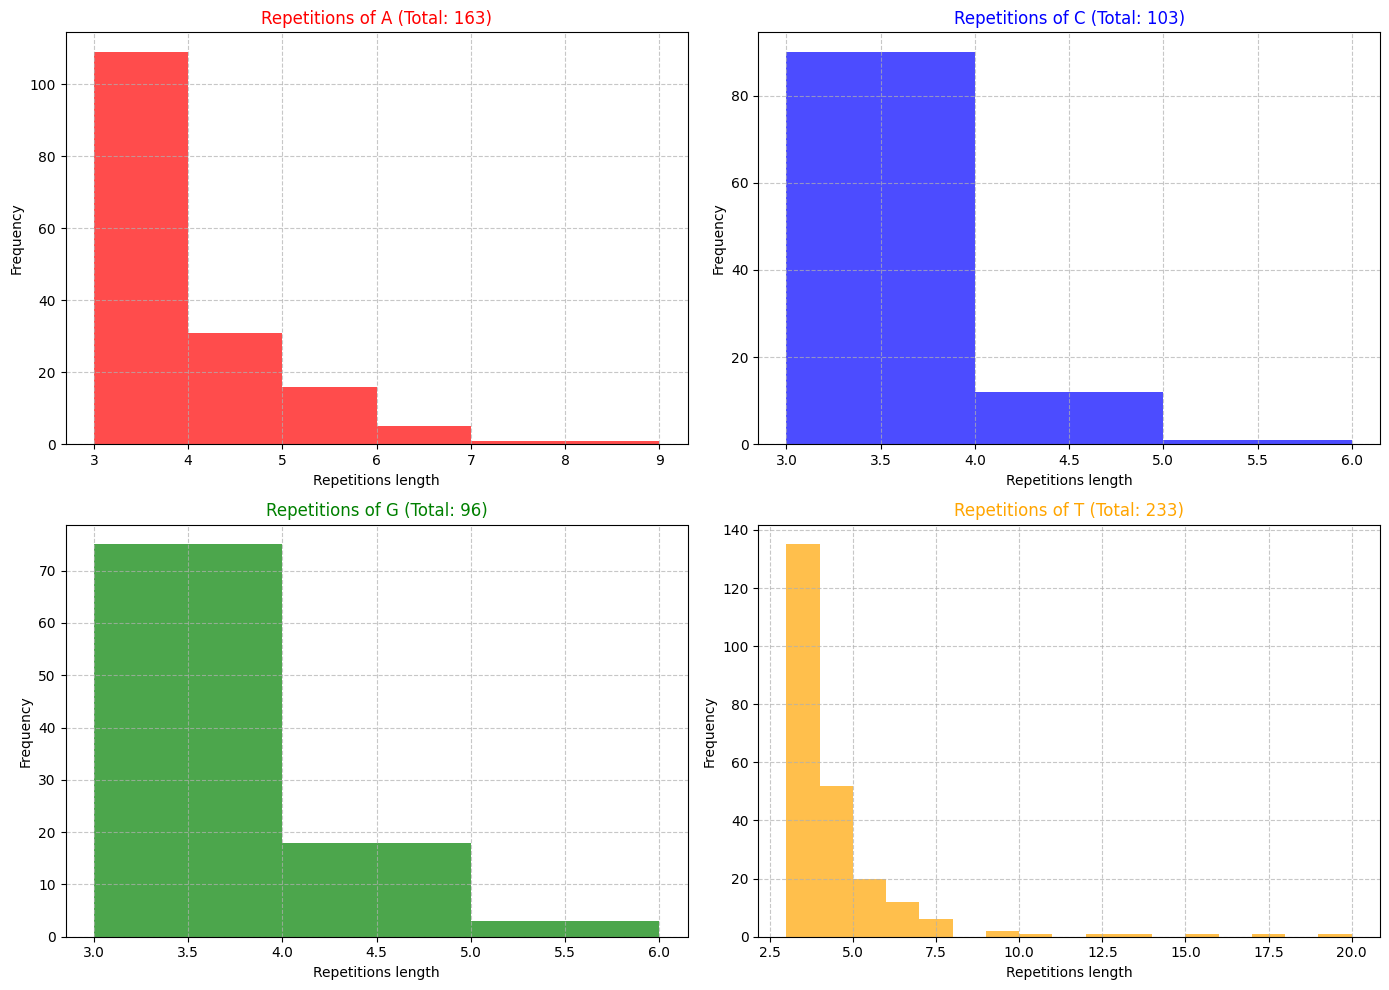

------POU5F1


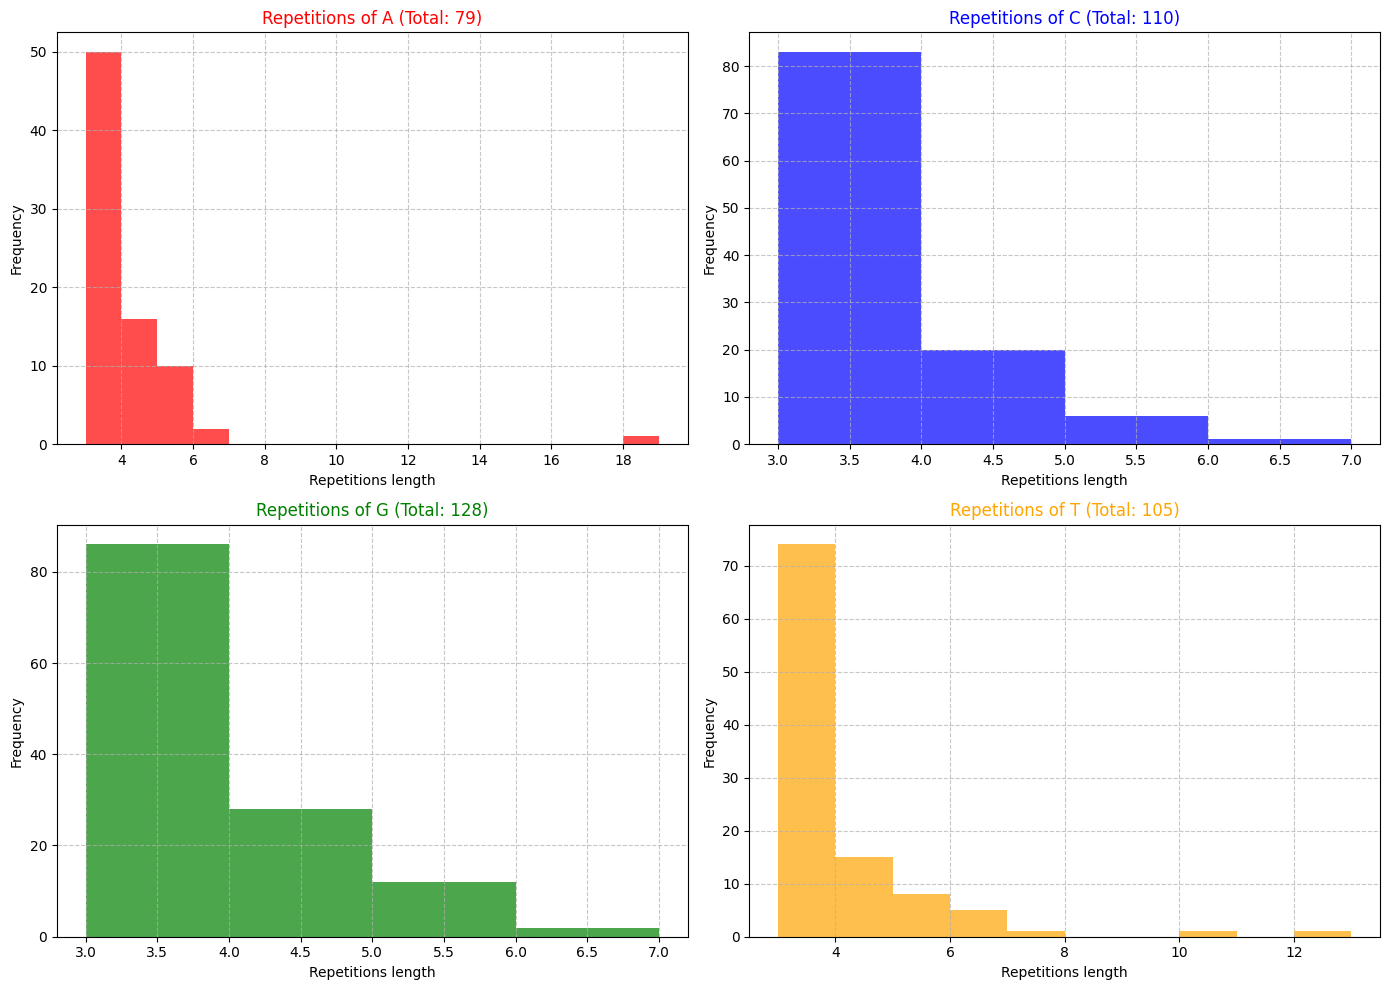

In [ ]:
for gene in gene_dictionary.values():
  print("------" + gene.name)
  toolkit1.find_reps(gene.sequence,3)

### 8- ORF finder
Open reading Frame:
* must start with a start codon
* must end with an end codon
* must contain triplets between start and stop (so multiple of three)
* is not necessary that the whole sequence starts with a start codon (so we don't insert the ^ operator)
* I want to extract all the sequences: from the shortest to the longest, so we use the non- greedy operator with find iter
* We DON'T use a greedy operator cause I mistakenly skip the orf that codify for the CDS

In [ ]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    for variant in gene.transcript_variants:
        print(variant.variant_id)
        first_codon = variant.cds[:3] if variant.cds else "ATG"
        print(f"START CODON CDS: {first_codon}")
        orf_pattern = rf"({first_codon})([ATGC]{{3}})+?(TAA|TAG|TGA)"
        m = regex.finditer(orf_pattern, variant.sequence, overlapped=True)
        for index, match in enumerate(m, start=1):
            print("ORF ", index, " ", match.group(0))
            if match.group(0) == variant.cds:
                print(f"CDS found in ORF {index}")


------NANOG
v1
START CODON CDS: ATG
ORF  1   ATGTTATTATGCAGGCAACTCACTTTATCCCAATTTCTTGATACTTTTCCTTCTGGAGGTCCTATTTCTCTAACATCTTCCAGAAAAGTCTTAAAGCTGCCTTAA
ORF  2   ATGCAGGCAACTCACTTTATCCCAATTTCTTGA
ORF  3   ATGAGTGTGGATCCAGCTTGTCCCCAAAGCTTGCCTTGCTTTGAAGCATCCGACTGTAAAGAATCTTCACCTATGCCTGTGATTTGTGGGCCTGAAGAAAACTATCCATCCTTGCAAATGTCTTCTGCTGAGATGCCTCACACGGAGACTGTCTCTCCTCTTCCTTCCTCCATGGATCTGCTTATTCAGGACAGCCCTGATTCTTCCACCAGTCCCAAAGGCAAACAACCCACTTCTGCAGAGAAGAGTGTCGCAAAAAAGGAAGACAAGGTCCCGGTCAAGAAACAGAAGACCAGAACTGTGTTCTCTTCCACCCAGCTGTGTGTACTCAATGATAGATTTCAGAGACAGAAATACCTCAGCCTCCAGCAGATGCAAGAACTCTCCAACATCCTGAACCTCAGCTACAAACAGGTGAAGACCTGGTTCCAGAACCAGAGAATGAAATCTAAGAGGTGGCAGAAAAACAACTGGCCGAAGAATAGCAATGGTGTGACGCAGAAGGCCTCAGCACCTACCTACCCCAGCCTTTACTCTTCCTACCACCAGGGATGCCTGGTGAACCCGACTGGGAACCTTCCAATGTGGAGCAACCAGACCTGGAACAATTCAACCTGGAGCAACCAGACCCAGAACATCCAGTCCTGGAGCAACCACTCCTGGAACACTCAGACCTGGTGCACCCAATCCTGGAACAATCAGGCCTGGAACAGTCCCTTCTATAACTGTGGAGAGGAATCTCTGCAGTCCTGCATGCAGTTCCAGCCAAATTCTCCTGCCAGTGACTTGGAGGCTGC

#### Find all version


In [9]:
for gene in gene_dictionary.values():
    print("------" + gene.name)
    for variant in gene.transcript_variants:
        print(variant.variant_id)
        first_codon = variant.cds[:3] if variant.cds else "ATG"
        print(f"START CODON CDS: {first_codon}")
        orf_pattern = rf"({first_codon}([ATGC]{{3}})+?(TAA|TAG|TGA))"
        m = regex.findall(orf_pattern, variant.sequence, overlapped=True)
        for index, match in enumerate(m, start=1):
            print("ORF ", index, " ", match[0])
            if match[0] == variant.cds:
                print("CDS found in ORF")


------NANOG
v1
START CODON CDS: ATG
ORF  1   ATGTTATTATGCAGGCAACTCACTTTATCCCAATTTCTTGATACTTTTCCTTCTGGAGGTCCTATTTCTCTAACATCTTCCAGAAAAGTCTTAAAGCTGCCTTAA
ORF  2   ATGCAGGCAACTCACTTTATCCCAATTTCTTGA
ORF  3   ATGAGTGTGGATCCAGCTTGTCCCCAAAGCTTGCCTTGCTTTGAAGCATCCGACTGTAAAGAATCTTCACCTATGCCTGTGATTTGTGGGCCTGAAGAAAACTATCCATCCTTGCAAATGTCTTCTGCTGAGATGCCTCACACGGAGACTGTCTCTCCTCTTCCTTCCTCCATGGATCTGCTTATTCAGGACAGCCCTGATTCTTCCACCAGTCCCAAAGGCAAACAACCCACTTCTGCAGAGAAGAGTGTCGCAAAAAAGGAAGACAAGGTCCCGGTCAAGAAACAGAAGACCAGAACTGTGTTCTCTTCCACCCAGCTGTGTGTACTCAATGATAGATTTCAGAGACAGAAATACCTCAGCCTCCAGCAGATGCAAGAACTCTCCAACATCCTGAACCTCAGCTACAAACAGGTGAAGACCTGGTTCCAGAACCAGAGAATGAAATCTAAGAGGTGGCAGAAAAACAACTGGCCGAAGAATAGCAATGGTGTGACGCAGAAGGCCTCAGCACCTACCTACCCCAGCCTTTACTCTTCCTACCACCAGGGATGCCTGGTGAACCCGACTGGGAACCTTCCAATGTGGAGCAACCAGACCTGGAACAATTCAACCTGGAGCAACCAGACCCAGAACATCCAGTCCTGGAGCAACCACTCCTGGAACACTCAGACCTGGTGCACCCAATCCTGGAACAATCAGGCCTGGAACAGTCCCTTCTATAACTGTGGAGAGGAATCTCTGCAGTCCTGCATGCAGTTCCAGCCAAATTCTCCTGCCAGTGACTTGGAGGCTGC

### 9- Check if the output of the polymerase match the protein

In [ ]:
for gene in gene_dictionary.values():
  print("------" + gene.name)
  for variant in gene.transcript_variants:
    print("-" + variant.variant_id)
    print("protein output-->" + toolkit.polymerase(variant.cds))
    print("protein check -->" + variant.protein)
    from rich import print
    if(toolkit.polymerase(variant.cds)[:-1] == variant.protein):  # removed * from the last position
      print("[green]The output of the polymerase matches the protein.[/green]")
    elif(toolkit.polymerase(variant.cds)[1:-1] == variant.protein[1:] and (variant.cds[0:3]== "CTG" or variant.cds[0:3]=="TTG" )): # searching for an alternative start codon
      print("[green]The output of the polymerase matches the protein[/green]" + "[yellow] with the start codon " + "(" + variant.cds[0:3] + ") coding for M but normally coding for " + toolkit.polymerase(variant.cds[0:3]) + ".[/yellow]")
    else:
      print("[red]The output of the polymerase does not match the protein.[/red]")
    from builtins import print


------NANOG
-v1
protein output-->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV*
protein check -->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV


The output of the polymerase matches the protein.

-v2
protein output-->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV*
protein check -->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV


The output of the polymerase matches the protein.

------POU5F1
-v1
protein output-->MAGHLASDFAFSPPPGGGGDGPGGPEPGWVDPRTWLSFQGPPGGPGIGPGVGPGSEVWGIPPCPPPYEFCGGMAYCGPQVGVGLVPQGGLETSQPEGEAGVGVESNSDGASPEPCTVTPGAVKLEKEKLEQNPEESQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MAGHLASDFAFSPPPGGGGDGPGGPEPGWVDPRTWLSFQGPPGGPGIGPGVGPGSEVWGIPPCPPPYEFCGGMAYCGPQVGVGLVPQGGLETSQPEGEAGVGVESNSDGASPEPCTVTPGAVKLEKEKLEQNPEESQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein.

-v2
protein output-->LGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein with the start codon (CTG) coding for M but normally coding for L.

-v3
protein output-->LGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein with the start codon (CTG) coding for M but normally coding for L.

-v4
protein output-->MCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein.

-v5
protein output-->MHFYRLFLGATRRFLNPEWKGEIDNWCVYVLTSLLPFKIQSQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MHFYRLFLGATRRFLNPEWKGEIDNWCVYVLTSLLPFKIQSQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein.

### 10- Extract 5' and 3' UTR (untranslated regions)


In [ ]:
for gene in gene_dictionary.values():
  print("------" + gene.name)
  for variant in gene.transcript_variants:
      trascritto_seq = variant.sequence
      cds_seq = variant.cds

      if cds_seq in trascritto_seq: # split method used on a string [sequence1-cds_seq-sequence2] return [sequence1][sequence2]
          utr_5_prime = trascritto_seq.split(cds_seq)[0]
          utr_3_prime = trascritto_seq.split(cds_seq)[1]

          print(f"Sequence 5'-UTR of variant {variant.variant_id} (length {len(utr_5_prime)}): {utr_5_prime}")
          print(f"Sequence 3'-UTR of variant {variant.variant_id} (length {len(utr_3_prime)}): {utr_3_prime}")
      else:
          print(f"CDS not in the {variant.variant_id}.")

------NANOG
Sequence 5'-UTR of variant v1 (length 213): ATAAATCTAGAGACTCCAGGATTTTAACGTTCTGCTGGACTGAGCTGGTTGCCTCATGTTATTATGCAGGCAACTCACTTTATCCCAATTTCTTGATACTTTTCCTTCTGGAGGTCCTATTTCTCTAACATCTTCCAGAAAAGTCTTAAAGCTGCCTTAACCTTTTTTCCAGTCCACCTCTTAAATTTTTTCCTCCTCTTCCTCTATACTAAC
Sequence 3'-UTR of variant v1 (length 4051): AGATGAGTGAAACTGATATTACTCAATTTCAGTCTGGACACTGGCTGAATCCTTCCTCTCCCCTCCTCCCATCCCTCATAGGATTTTTCTTGTTTGGAAACCACGTGTTCTGGTTTCCATGATGCCCATCCAGTCAATCTCATGGAGGGTGGAGTATGGTTGGAGCCTAATCAGCGAGGTTTCTTTTTTTTTTTTTTTCCTATTGGATCTTCCTGGAGAAAATACTTTTTTTTTTTTTTTTTTTGAAACGGAGTCTTGCTCTGTCGCCCAGGCTGGAGTGCAGTGGCGCGGTCTTGGCTCACTGCAAGCTCCGTCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGCAGCTGGGACTACAGGCGCCCGCCACCTCGCCCGGCTAATATTTTGTATTTTTAGTAGAGACGGGGTTTCACTGTGTTAGCCAGGATGGTCTCGATCTCCTGACCTTGTGATCCACCCGCCTCGGCCTCCCTAACAGCTGGGATTTACAGGCGTGAGCCACCGCGCCCTGCCTAGAAAAGACATTTTAATAACCTTGGCTGCCGTCTCTGGCTATAGATAAGTAGATCTAATACTAGTTTGGATATCTTTAGGGTTTAGAATCTAACCTCAAGAATAAGAAATACAAGTACAAATTGGTGATGAAGATGTATTCGTATTGTTTGGGATTGG

### 11- Extract introns sequences from each transcript

In [ ]:
from rich import print
gene_dictionary_exons_introns = {}
for gene in gene_dictionary.values():
  print("------" + gene.name)
  gene.print_transcript_info()
  gene_dictionary_exons_introns[gene.name] = gene.get_exon_intron_indices()
  print(gene_dictionary_exons_introns[gene.name])
from builtins import print


------NANOG

Gene NANOG: Length = 9745


-- v1 start index = -1 end index = -1 

  - exon 1 start index = 0 end index = 363
  - exon 2 start index = 3548 end index = 3810
  - exon 3 start index = 5055 end index = 5141
  - exon 4 start index = 5277 end index = 9744


-- v2 start index = -1 end index = -1 

  - exon 1 start index = 0 end index = 363
  - exon 2 start index = 3548 end index = 3810
  - exon 3 start index = 5055 end index = 5141
  - exon 4 start index = 5325 end index = 6659


{
    'v1': [
        ('exon', 0, 363),
        ('exon', 3548, 3810),
        ('exon', 5055, 5141),
        ('exon', 5277, 9744),
        ('intron', 364, 3547),
        ('intron', 3811, 5054),
        ('intron', 5142, 5276)
    ],
    'v2': [
        ('exon', 0, 363),
        ('exon', 3548, 3810),
        ('exon', 5055, 5141),
        ('exon', 5325, 6659),
        ('intron', 364, 3547),
        ('intron', 3811, 5054),
        ('intron', 5142, 5324)
    ]
}

------POU5F1

Gene POU5F1: Length = 6346


-- v1 start index = -1 end index = -1 

  - exon 1 start index = 0 end index = 466
  - exon 2 start index = 4635 end index = 4755
  - exon 3 start index = 4981 end index = 5111
  - exon 4 start index = 5396 end index = 5554
  - exon 5 start index = 5815 end index = 6345


-- v2 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 4755
  - exon 2 start index = 4981 end index = 5111
  - exon 3 start index = 5396 end index = 5554
  - exon 4 start index = 5815 end index = 6345


-- v3 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 4148
  - exon 2 start index = 4635 end index = 4755
  - exon 3 start index = 4981 end index = 5111
  - exon 4 start index = 5396 end index = 5554
  - exon 5 start index = 5815 end index = 6345


-- v4 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 5111
  - exon 2 start index = 5396 end index = 5554
  - exon 3 start index = 5815 end index = 6345


-- v5 start index = -1 end index = -1 

  - exon 1 start index = -1 end index = -1

  - exon 2 start index = 4981 end index = 5111
  - exon 3 start index = 5396 end index = 5554
  - exon 4 start index = 5815 end index = 6345


Error: exon 1 in v5 sequence: 
GGAAAAAAGGAAAGTGCACTTGGAAGAGATCCAAGTGGGCAACTTGAAGAACAAGTGCCAAATAGCACTTCTGTCATGCTGGATGTCAGGGCTCTTTGTCCACTTTGTATAGCCG
CTGGCTTATAGAAGGTGCTCGATAAATCTCTTGAATTTAAAAATCAATTAGGATGCCTCTATAGTGAAAAAGATACAGTAAAGATGAGGGATAATCAATTTAAAAAATGAGTAAG
TACACACAAAGCACTTTATCCATTCTTATGACACCTGTTACTTTTTTGCTGTGTTTGTGTGTATGCATGCCATGTTATAGTTTGTGGGACCCTCAAAGCAAGCTGGGGAGAGTAT
ATACTGAATTTAGCTTCTGAGACATGATGCTCTTCCTTTTTAATTAACCCAGAACTTAGCAGCTTATCTATTTCTCTAATCTCAAAACATCCTTAAACTGGGGGTGATACTTGAG
TGAGAGAATTTTGCAGGTATTAAATGAACTATCTTCTTTTTTTTTTTTCTTTGAGACAGAGTCTTGCTCTGTCACCCAGGCTGGAGTGCAGTGGCGTGATCTCAGCTCACTGCAA
CCTCCGCCTCCCGGGTTCAAGTGATTCTCCTGCCTCAGCCTCCTGAGTAGCTGGGATTACAGGTGCGTGCCACCGTGCCCAGCTAATTTTTGTGTTTTTAGTAGAGACGGGGTTT
CACCATGTTGGCCATGCTGGTCTTGAACTCCTGACCTCGTGATCTGCCCACCTCGGCCTCCCAAAGTGCTGGAATTATAGGCGTGAGCCACCGCGCCCAGCAAAGAACTTCTAAC
CTTCATAACCTGACAGGTGTTCTCGAGGCCAGGGTCTCTCTTTCTGTCCTTTCACGATGCTCTGCATCCCTTGGATGTGCCAGTTTCTGGGGGAAGAGTAGTCCTTTGTTACATG
CATGAGTCAGTGAACAGGGAATGGGTGAATGACATTTGTGGGTAGGTTATTTCTAGAAGTTAGGTGGGCAGCTTGGAAGGCAGATGCACTTCTACAGACTATTCCTTGGGGCCAC
ACGTAGGTTCTTGAATCCCGAATGGAAAGGGGAGATTGATAACTGGTGTGTTTATGTTCTTACAAGTCTTCTGCCTTTTAAAATCCAGTCCCAGGACATCAAAGCTCTGCAGAAA
GAACTCGAGCAATTTGCCAAGCTCCTGAAGCAGAAGAGGATCACCCTGGGATATACACAGGCCGATGTGGGGCTCACCCTGGGGGTTCTATTTG not found in the 
variant sequence.

{
    'v1': [
        ('exon', 0, 466),
        ('exon', 4635, 4755),
        ('exon', 4981, 5111),
        ('exon', 5396, 5554),
        ('exon', 5815, 6345),
        ('intron', 467, 4634),
        ('intron', 4756, 4980),
        ('intron', 5112, 5395),
        ('intron', 5555, 5814)
    ],
    'v2': [
        ('intron', 0, 3511),
        ('exon', 3512, 4755),
        ('exon', 4981, 5111),
        ('exon', 5396, 5554),
        ('exon', 5815, 6345),
        ('intron', 4756, 4980),
        ('intron', 5112, 5395),
        ('intron', 5555, 5814)
    ],
    'v3': [
        ('intron', 0, 3511),
        ('exon', 3512, 4148),
        ('exon', 4635, 4755),
        ('exon', 4981, 5111),
        ('exon', 5396, 5554),
        ('exon', 5815, 6345),
        ('intron', 4149, 4634),
        ('intron', 4756, 4980),
        ('intron', 5112, 5395),
        ('intron', 5555, 5814)
    ],
    'v4': [
        ('intron', 0, 3511),
        ('exon', 3512, 5111),
        ('exon', 5396, 5554),
        ('exon', 5815, 6345),
        ('intron', 5112, 5395),
        ('intron', 5555, 5814)
    ],
    'v5': [
        ('exon', 4981, 5111),
        ('exon', 5396, 5554),
        ('exon', 5815, 6345),
        ('intron', 5112, 5395),
        ('intron', 5555, 5814)
    ]
}

The matching with Blast shows that there is a single mismatch that cannot let us find the exon (gene POU5F1 transcript v5 exon 1). There is a single mismatch at index 1004

image.png

In [ ]:
from rich import print
def compare_strings(string1, string2):
    max_len = min(len(string1), len(string2))

    string1_colored = []
    string2_colored = []

    for i in range(max_len):
        if string1[i] == string2[i]:
            string1_colored.append(f"[green]{string1[i]}[/green]")
            string2_colored.append(f"[green]{string2[i]}[/green]")
        else:
            print("[yellow]mismatch at index [/yellow]" + str(i))
            string1_colored.append(f"[red]{string1[i]}[/red]")
            string2_colored.append(f"[red]{string2[i]}[/red]")

    print("String 1: ", "".join(string1_colored))
    print("String 2: ", "".join(string2_colored))




transcript_seq = POU5F1.getTranscriptVariant("v5").sequence[0:1245]
gene_seq = POU5F1.sequence[3512:4757] # indexes taken by BLAST

compare_strings(transcript_seq, gene_seq)
from builtins import print

mismatch at index 1004

String 1:  
GGAAAAAAGGAAAGTGCACTTGGAAGAGATCCAAGTGGGCAACTTGAAGAACAAGTGCCAAATAGCACTTCTGTCATGCTGGATGTCAGGGCTCTTTGTCCACTTTGTATAGCCG
CTGGCTTATAGAAGGTGCTCGATAAATCTCTTGAATTTAAAAATCAATTAGGATGCCTCTATAGTGAAAAAGATACAGTAAAGATGAGGGATAATCAATTTAAAAAATGAGTAAG
TACACACAAAGCACTTTATCCATTCTTATGACACCTGTTACTTTTTTGCTGTGTTTGTGTGTATGCATGCCATGTTATAGTTTGTGGGACCCTCAAAGCAAGCTGGGGAGAGTAT
ATACTGAATTTAGCTTCTGAGACATGATGCTCTTCCTTTTTAATTAACCCAGAACTTAGCAGCTTATCTATTTCTCTAATCTCAAAACATCCTTAAACTGGGGGTGATACTTGAG
TGAGAGAATTTTGCAGGTATTAAATGAACTATCTTCTTTTTTTTTTTTCTTTGAGACAGAGTCTTGCTCTGTCACCCAGGCTGGAGTGCAGTGGCGTGATCTCAGCTCACTGCAA
CCTCCGCCTCCCGGGTTCAAGTGATTCTCCTGCCTCAGCCTCCTGAGTAGCTGGGATTACAGGTGCGTGCCACCGTGCCCAGCTAATTTTTGTGTTTTTAGTAGAGACGGGGTTT
CACCATGTTGGCCATGCTGGTCTTGAACTCCTGACCTCGTGATCTGCCCACCTCGGCCTCCCAAAGTGCTGGAATTATAGGCGTGAGCCACCGCGCCCAGCAAAGAACTTCTAAC
CTTCATAACCTGACAGGTGTTCTCGAGGCCAGGGTCTCTCTTTCTGTCCTTTCACGATGCTCTGCATCCCTTGGATGTGCCAGTTTCTGGGGGAAGAGTAGTCCTTTGTTACATG
CATGAGTCAGTGAACAGGGAATGGGTGAATGACATTTGTGGGTAGGTTATTTCTAGAAGTTAGGTGGGCAGCTTGGAAGGCAGATGCACTTCTACAGACTATTCCTTGGGGCCAC
ACGTAGGTTCTTGAATCCCGAATGGAAAGGGGAGATTGATAACTGGTGTGTTTATGTTCTTACAAGTCTTCTGCCTTTTAAAATCCAGTCCCAGGACATCAAAGCTCTGCAGAAA
GAACTCGAGCAATTTGCCAAGCTCCTGAAGCAGAAGAGGATCACCCTGGGATATACACAGGCCGATGTGGGGCTCACCCTGGGGGTTCTATTTGG

String 2:  
GGAAAAAAGGAAAGTGCACTTGGAAGAGATCCAAGTGGGCAACTTGAAGAACAAGTGCCAAATAGCACTTCTGTCATGCTGGATGTCAGGGCTCTTTGTCCACTTTGTATAGCCG
CTGGCTTATAGAAGGTGCTCGATAAATCTCTTGAATTTAAAAATCAATTAGGATGCCTCTATAGTGAAAAAGATACAGTAAAGATGAGGGATAATCAATTTAAAAAATGAGTAAG
TACACACAAAGCACTTTATCCATTCTTATGACACCTGTTACTTTTTTGCTGTGTTTGTGTGTATGCATGCCATGTTATAGTTTGTGGGACCCTCAAAGCAAGCTGGGGAGAGTAT
ATACTGAATTTAGCTTCTGAGACATGATGCTCTTCCTTTTTAATTAACCCAGAACTTAGCAGCTTATCTATTTCTCTAATCTCAAAACATCCTTAAACTGGGGGTGATACTTGAG
TGAGAGAATTTTGCAGGTATTAAATGAACTATCTTCTTTTTTTTTTTTCTTTGAGACAGAGTCTTGCTCTGTCACCCAGGCTGGAGTGCAGTGGCGTGATCTCAGCTCACTGCAA
CCTCCGCCTCCCGGGTTCAAGTGATTCTCCTGCCTCAGCCTCCTGAGTAGCTGGGATTACAGGTGCGTGCCACCGTGCCCAGCTAATTTTTGTGTTTTTAGTAGAGACGGGGTTT
CACCATGTTGGCCATGCTGGTCTTGAACTCCTGACCTCGTGATCTGCCCACCTCGGCCTCCCAAAGTGCTGGAATTATAGGCGTGAGCCACCGCGCCCAGCAAAGAACTTCTAAC
CTTCATAACCTGACAGGTGTTCTCGAGGCCAGGGTCTCTCTTTCTGTCCTTTCACGATGCTCTGCATCCCTTGGATGTGCCAGTTTCTGGGGGAAGAGTAGTCCTTTGTTACATG
CATGAGTCAGTGAACAGGGAATGGGTGAATGACATTTGTGGGTAGGTTATTTCTAGAAGTTAGGTGGGCAGCTTGGAAGGCAGAGGCACTTCTACAGACTATTCCTTGGGGCCAC
ACGTAGGTTCTTGAATCCCGAATGGAAAGGGGAGATTGATAACTGGTGTGTTTATGTTCTTACAAGTCTTCTGCCTTTTAAAATCCAGTCCCAGGACATCAAAGCTCTGCAGAAA
GAACTCGAGCAATTTGCCAAGCTCCTGAAGCAGAAGAGGATCACCCTGGGATATACACAGGCCGATGTGGGGCTCACCCTGGGGGTTCTATTTGG

We can proceed in adding 3512:4757 exon sequence to the exons of the v5 transcript.

In [ ]:
from rich import print
for gene in gene_dictionary.values():
    if gene.name == 'POU5F1':
        gene.print_transcript_info()
new_exon = ('exon', 3512, 4757)
new_intron = ('intron',0,3511)
if new_exon not in gene_dictionary_exons_introns['POU5F1']['v5']:
    gene_dictionary_exons_introns['POU5F1']['v5'].append(new_exon)
    gene_dictionary_exons_introns['POU5F1']['v5'].sort(key=lambda x: (0 if x[0] == 'exon' else 1, x[1]))
else:
    print("exon already added.")
if new_intron not in gene_dictionary_exons_introns['POU5F1']['v5']:
    gene_dictionary_exons_introns['POU5F1']['v5'].append(new_intron)
    gene_dictionary_exons_introns['POU5F1']['v5'].sort(key=lambda x: (0 if x[0] == 'exon' else 1, x[1]))
else:
    print("intron already added.")
print(gene_dictionary_exons_introns['POU5F1']['v5'])
from builtins import print

Gene POU5F1: Length = 6346


-- v1 start index = -1 end index = -1 

  - exon 1 start index = 0 end index = 466
  - exon 2 start index = 4635 end index = 4755
  - exon 3 start index = 4981 end index = 5111
  - exon 4 start index = 5396 end index = 5554
  - exon 5 start index = 5815 end index = 6345


-- v2 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 4755
  - exon 2 start index = 4981 end index = 5111
  - exon 3 start index = 5396 end index = 5554
  - exon 4 start index = 5815 end index = 6345


-- v3 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 4148
  - exon 2 start index = 4635 end index = 4755
  - exon 3 start index = 4981 end index = 5111
  - exon 4 start index = 5396 end index = 5554
  - exon 5 start index = 5815 end index = 6345


-- v4 start index = -1 end index = -1 

  - exon 1 start index = 3512 end index = 5111
  - exon 2 start index = 5396 end index = 5554
  - exon 3 start index = 5815 end index = 6345


-- v5 start index = -1 end index = -1 

  - exon 1 start index = -1 end index = -1

  - exon 2 start index = 4981 end index = 5111
  - exon 3 start index = 5396 end index = 5554
  - exon 4 start index = 5815 end index = 6345


exon already added.

[
    ('exon', 3512, 4757),
    ('exon', 4981, 5111),
    ('exon', 5396, 5554),
    ('exon', 5815, 6345),
    ('intron', 0, 3511),
    ('intron', 5112, 5395),
    ('intron', 5555, 5814)
]

### 12- Nucleotide gintions between exons and introns

In [ ]:
for gene_name, gene_obj in gene_dictionary.items():
    print(f"--- {gene_name}")
    gene_obj.print_exon_intron_flanks_with_indices()

--- NANOG

Transcript Variant: v1
  Exon 1 (start: 0, end: 363)
  Exon 1 is at the start of the gene sequence, no intron before.
    Last 2 nucleotides of exon: TG INDEX 362-363
    First 2 nucleotides of intron: GT INDEX 364-365
  Exon 2 (start: 3548, end: 3810)
    Last 2 nucleotides of intron: AG INDEX 3546-3547
    First 2 nucleotides of exon: TC INDEX 3548-3549
    Last 2 nucleotides of exon: AG INDEX 3809-3810
    First 2 nucleotides of intron: GT INDEX 3811-3812
  Exon 3 (start: 5055, end: 5141)
    Last 2 nucleotides of intron: AG INDEX 5053-5054
    First 2 nucleotides of exon: GT INDEX 5055-5056
    Last 2 nucleotides of exon: AG INDEX 5140-5141
    First 2 nucleotides of intron: GT INDEX 5142-5143
  Exon 4 (start: 5277, end: 9744)
    Last 2 nucleotides of intron: AG INDEX 5275-5276
    First 2 nucleotides of exon: AA INDEX 5277-5278
  Exon 4 is at the end of the gene sequence, no intron after.

Transcript Variant: v2
  Exon 1 (start: 0, end: 363)
  Exon 1 is at the start of

### 13- Searching for restriction sites

In [ ]:
restriction_sites = {
    "EcoRl": "GAATTC",
    "Xbal": "(?<!GA)TCTAGA(?!TC)",
    "Clal": "ATCGAT",
    "Eael": "(?<!CC)(C|T)GGCC(A|G)(?!GG)"
}
gene_restriction_counts = {}
for gene_name, gene in gene_dictionary.items():
    print(f"Processing gene: {gene_name}")
    lista = []

    for site, pattern in restriction_sites.items():
        sites = regex.finditer(pattern, gene.sequence)
        count = sum(1 for _ in sites)

        sites = regex.finditer(pattern, gene.sequence)
        for s in sites:
            print("Restriction site", site, f"found in the position [{s.start()}, {s.end()}]")

        print("Restriction site", site, "found", count, "times")
        lista.append(count)

    gene_restriction_counts[gene_name] = lista

print(gene_restriction_counts)

Processing gene: NANOG
Restriction site EcoRl found in the position [591, 597]
Restriction site EcoRl found 1 times
Restriction site Xbal found in the position [5, 11]
Restriction site Xbal found in the position [2286, 2292]
Restriction site Xbal found in the position [9042, 9048]
Restriction site Xbal found 3 times
Restriction site Clal found 0 times
Restriction site Eael found in the position [3302, 3308]
Restriction site Eael found in the position [4246, 4252]
Restriction site Eael found in the position [5112, 5118]
Restriction site Eael found in the position [7858, 7864]
Restriction site Eael found in the position [8783, 8789]
Restriction site Eael found 5 times
Processing gene: POU5F1
Restriction site EcoRl found 0 times
Restriction site Xbal found in the position [4483, 4489]
Restriction site Xbal found 1 times
Restriction site Clal found 0 times
Restriction site Eael found in the position [1097, 1103]
Restriction site Eael found in the position [2135, 2141]
Restriction site Eael

### 14-Biopython

In [ ]:
!pip install biopython requests
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
import requests
from io import StringIO
Entrez.email = "simone.caputo01@universitadipavia.it"


#### 14-1 printing informations

In [ ]:
def create_gene_and_variants(genomic_accession, start, end):
    handle = Entrez.efetch(db="nucleotide", id=genomic_accession, rettype="gbwithparts", retmode="text", seq_start=start, seq_stop=end)
    record = SeqIO.read(handle, "gb")
    handle.close()

    gene = None

    for f in record.features: # iterate on the freatures of the sequence
        if f.type == "gene":
            gene_name = f.qualifiers.get("gene")[0]
            gene = Gene(gene_name, str(record.seq))
            if f.location.strand == -1:
                gene.setSequence(str(record.seq[f.location.start:f.location.end].reverse_complement()))
            else:
                gene.setSequence(str(record.seq[f.location.start:f.location.end]))

        if gene and f.type == "mRNA":
            transcript_id = f.qualifiers.get("transcript_id")[0]

            handle1 = Entrez.efetch(db="nucleotide", id=transcript_id, rettype="gbwithparts", retmode="text")
            record1 = SeqIO.read(handle1, "gb")
            handle1.close()

            variant = gene.addTranscriptVariant(transcript_id, str(record1.seq))

            for g in record1.features: # iterate on the features of the transcript
                if g.type == "exon":
                    exon_seq = str(record1.seq[g.location.start:g.location.end])
                    variant.setExon(exon_seq)

                elif g.type == "CDS":
                    cds_seq = str(record1.seq[g.location.start:g.location.end])
                    variant.setCDS(cds_seq)
                    protein_seq = g.qualifiers.get("translation", [""])[0]
                    variant.setProtein(protein_seq)

    return gene


NANOG = create_gene_and_variants("NC_000012.12", 7789402, 7799146)
POU5F1 = create_gene_and_variants("NC_000006", 31164337, 31170682)

genes = [NANOG, POU5F1]


#### 14-2 GC contenute


In [ ]:
for gene in genes:
  print(gene.name + " --> " + str(round((gene.sequence.count("G") + gene.sequence.count("C"))/len(gene.sequence)*100,2)) + "% of G and C")

NANOG --> 43.74% of G and C
POU5F1 --> 51.29% of G and C


#### 14- 9 polymerase

In [ ]:
def polymerase(sequence):
    seq_obj = Seq(sequence)
    return str(seq_obj.translate())

for gene in genes:
  print("------" + gene.name)
  for variant in gene.transcript_variants:
    print("-" + variant.variant_id)
    print("protein output-->" + polymerase(variant.cds))
    print("protein check -->" + variant.protein)
    from rich import print
    if(polymerase(variant.cds)[:-1] == variant.protein):
      print("[green]The output of the polymerase matches the protein.[/green]")
    elif(polymerase(variant.cds)[1:-1] == variant.protein[1:] and (variant.cds[0:3]== "CTG" or variant.cds[0:3]=="TTG" )):
      print("[green]The output of the polymerase matches the protein[/green]" + "[yellow] with the start codon " + "(" + variant.cds[0:3] + ") coding for M but normally coding for " + toolkit.polymerase(variant.cds[0:3]) + ".[/yellow]")
    else:
      print("[red]The output of the polymerase does not match the protein.[/red]")
    from builtins import print


------NANOG
-NM_024865.4
protein output-->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV*
protein check -->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQKASAPTYPSLYSSYHQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV


The output of the polymerase matches the protein.

-NM_001297698.2
protein output-->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV*
protein check -->MSVDPACPQSLPCFEASDCKESSPMPVICGPEENYPSLQMSSAEMPHTETVSPLPSSMDLLIQDSPDSSTSPKGKQPTSAEKSVAKKEDKVPVKKQKTRTVFSSTQLCVLNDRFQRQKYLSLQQMQELSNILNLSYKQVKTWFQNQRMKSKRWQKNNWPKNSNGVTQGCLVNPTGNLPMWSNQTWNNSTWSNQTQNIQSWSNHSWNTQTWCTQSWNNQAWNSPFYNCGEESLQSCMQFQPNSPASDLEAALEAAGEGLNVIQQTTRYFSTPQTMDLFLNYSMNMQPEDV


The output of the polymerase matches the protein.

------POU5F1
-NM_002701.6
protein output-->MAGHLASDFAFSPPPGGGGDGPGGPEPGWVDPRTWLSFQGPPGGPGIGPGVGPGSEVWGIPPCPPPYEFCGGMAYCGPQVGVGLVPQGGLETSQPEGEAGVGVESNSDGASPEPCTVTPGAVKLEKEKLEQNPEESQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MAGHLASDFAFSPPPGGGGDGPGGPEPGWVDPRTWLSFQGPPGGPGIGPGVGPGSEVWGIPPCPPPYEFCGGMAYCGPQVGVGLVPQGGLETSQPEGEAGVGVESNSDGASPEPCTVTPGAVKLEKEKLEQNPEESQDIKALQKELEQFAKLLKQKRITLGYTQADVGLTLGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein.

-NM_001173531.3
protein output-->LGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein with the start codon (CTG) coding for M but normally coding for L.

-NM_203289.6
protein output-->LGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MGVLFGKVFSQTTICRFEALQLSFKNMCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein with the start codon (CTG) coding for M but normally coding for L.

-NM_001285986.2
protein output-->MCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN*
protein check -->MCKLRPLLQKWVEEADNNENLQEICKAETLVQARKRKRTSIENRVRGNLENLFLQCPKPTLQQISHIAQQLGLEKDVVRVWFCNRRQKGKRSSSDYAQREDFEAAGSPFSGGPVSFPLAPGPHFGTPGYGSPHFTALYSSVPFPEGEAFPPVSVTTLGSPMHSN


The output of the polymerase matches the protein.

# 2 - ldhA and frdA (E. coli.)

* ldhA https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3?from=1441854&to=1442843&report=genbank&strand=true

## Fetching classes for prokaryotes genes

In [ ]:
class Gene_p:
    def __init__(self, name, input_sequence):
        self.name = name
        self.sequence = input_sequence
        self.cds = None
        self.protein = None
    def setSequence(self, sequence):
        self.sequence = sequence
    def setCDS(self, cds_sequence):
        self.cds = cds_sequence
    def setProtein(self, protein_sequence):
        self.protein = protein_sequence
    def __str__(self):
        output = f"--------------------------------------------\nGene Name: {self.name}\n"
        output += f"Full Gene Sequence (Length: {len(self.sequence) if self.sequence else 'N/A'}):\n"
        if self.sequence:
            output += f"(Length: {len(self.sequence)}): {self.sequence}\n"
        else:
            output += "No gene sequence available.\n"

        output += "\nCDS:\n"
        if self.cds:
            output += f"  CDS Sequence (Length: {len(self.cds)}): {self.cds}\n"
        else:
            output += "  No CDS sequence available.\n"
        output += "\nProtein:\n"
        if self.protein:
            output += f"  Protein Sequence (Length: {len(self.protein)}): {self.protein}\n"
        else:
            output += "  No protein sequence available.\n"

        return output
    def GCamount(self):
        cont_GC = self.sequence.count('G') + self.sequence.count('C')
        print("GC amount for the gene " + self.name + ": " + str(round(cont_GC * 100 / len(self.sequence),3)) + "%")

## Saving genes and printing proteins

In [ ]:
from builtins import print
def create_gene_prokaryote(genomic_accession, start, end):
    handle = Entrez.efetch(db="nucleotide", id=genomic_accession, rettype="gbwithparts", retmode="text", seq_start=start, seq_stop=end)
    record = SeqIO.read(handle, "gb")
    handle.close()

    gene = None

    for f in record.features:
        if f.type == "gene":
            gene_name = f.qualifiers.get("gene")[0]
            gene = Gene_p(gene_name, str(record.seq))
            if f.location.strand == -1:
                gene.setSequence(str(record.seq[f.location.start:f.location.end].reverse_complement()))
            else:
                gene.setSequence(str(record.seq[f.location.start:f.location.end]))
        elif f.type == "CDS":
                    if f.location.strand == -1:
                        cds_seq = str(record.seq[f.location.start:f.location.end].reverse_complement())
                    else:
                        cds_seq = str(record.seq[f.location.start:f.location.end])
                    gene.setCDS(cds_seq)
                    protein_seq = f.qualifiers.get("translation", [""])[0]
                    gene.setProtein(protein_seq)

    return gene
ldhA = create_gene_prokaryote("NC_000913.3", 1441854, 1442843)
frdA = create_gene_prokaryote("NC_000913.3", 4380510, 4382318)

genes_p = {'ldhA': ldhA, 'frdA': frdA}
for gene_name, gene_obj in genes_p.items():
    print(gene_obj)
print(" gene ldha ")
print("github cds translation    --> ",polymerase(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/procaryotes/ldhA/CDS.fasta"))))
print("extracted cds translation --> ",polymerase(ldhA.cds))
print("extracted protein         --> ",ldhA.protein)
print(" gene frdA ")
print("github cds translation    --> ",polymerase(toolkit1.extractSequenceFromFASTA(toolkit1.readFASTA("https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/procaryotes/frdA/CDS.fasta"))))
print("extracted cds translation --> ",polymerase(frdA.cds))
print("extracted protein         --> ",frdA.protein)



--------------------------------------------
Gene Name: ldhA
Full Gene Sequence (Length: 990):
(Length: 990): ATGAAACTCGCCGTTTATAGCACAAAACAGTACGACAAGAAGTACCTGCAACAGGTGAACGAGTCCTTTGGCTTTGAGCTGGAATTTTTTGACTTTCTGCTGACGGAAAAAACCGCTAAAACTGCCAATGGCTGCGAAGCGGTATGTATTTTCGTAAACGATGACGGCAGCCGCCCGGTGCTGGAAGAGCTGAAAAAGCACGGCGTTAAATATATCGCCCTGCGCTGTGCCGGTTTCAATAACGTCGACCTTGACGCGGCAAAAGAACTGGGGCTGAAAGTAGTCCGTGTTCCAGCCTATGATCCAGAGGCCGTTGCTGAACACGCCATCGGTATGATGATGACGCTGAACCGCCGTATTCACCGCGCGTATCAGCGTACCCGTGATGCTAACTTCTCTCTGGAAGGTCTGACCGGCTTTACTATGTATGGCAAAACGGCAGGCGTTATCGGTACCGGTAAAATCGGTGTGGCGATGCTGCGCATTCTGAAAGGTTTTGGTATGCGTCTGCTGGCGTTCGATCCGTATCCAAGTGCAGCGGCGCTGGAACTCGGTGTGGAGTATGTCGATCTGCCAACCCTGTTCTCTGAATCAGACGTTATCTCTCTGCACTGCCCGCTGACACCGGAAAACTATCATCTGTTGAACGAAGCCGCCTTCGAACAGATGAAAAATGGCGTGATGATCGTCAATACCAGTCGCGGTGCATTGATTGATTCTCAGGCAGCAATTGAAGCGCTGAAAAATCAGAAAATTGGTTCGTTGGGTATGGACGTGTATGAGAACGAACGCGATCTATTCTTTGAAGATAAATCCAACGACGTGATCCAGGATGACGTATTCCGTCGCCTGTCTGCCTGCCACAACGTGCTGTTTACCGGGCACCAGGC

In this bacterial organism, GTG is an alternative start codon. It means that it can initiate translation via an initiator-tRNA that puts in the amino acid Methionine (M) into the protein. However, if GTG occurs inside the sequence, it gets translated to valine (V) as usual

# 3 - E. Coli intergenic sequences
Extract the sequence from 361249 and 366305 (GenBank format) and use Biopython to extract intergenic sequences
https://www.ncbi.nlm.nih.gov/nuccore/556503834

In [ ]:
from Bio import SeqIO
import requests
from io import StringIO
from builtins import print
def extract_intergenic_features_from_url(genbank_url):
    response = requests.get(genbank_url)
    response.raise_for_status()

    record = SeqIO.read(StringIO(response.text), "genbank")

    intergenic_regions = []

    features = record.features
    # print("1",features) # 1 [SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(5057), strand=1), type='source', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(612), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(612), strand=-1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(677), ExactPosition(1931), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(677), ExactPosition(1931), strand=-1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(1982), ExactPosition(5057), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(1982), ExactPosition(5057), strand=-1), type='CDS', qualifiers=...)]

    genes = [feature for feature in features if feature.type == "gene"]
    # print("2",genes) # 2 [SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(612), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(677), ExactPosition(1931), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(1982), ExactPosition(5057), strand=-1), type='gene', qualifiers=...)]

    genes.sort(key=lambda x: x.location.start)
    # print("3",genes) # 3 3 [SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(612), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(677), ExactPosition(1931), strand=-1), type='gene', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(1982), ExactPosition(5057), strand=-1), type='gene', qualifiers=...)]

    gene_positions = [(int(gene.location.start), int(gene.location.end), gene.qualifiers.get('gene', [''])[0]) for gene in genes]
    # print("4",gene_positions) # 4 [(0, 612, 'lacA'), (677, 1931, 'lacY'), (1982, 5057, 'lacZ')]
    for i in range(len(gene_positions) - 1):
        end_of_current_gene = gene_positions[i][1]
        start_of_next_gene = gene_positions[i + 1][0]

        if start_of_next_gene > end_of_current_gene:
            intergenic_length = start_of_next_gene - end_of_current_gene
            intergenic_info = {
                "start": end_of_current_gene,
                "end": start_of_next_gene,
                "length": intergenic_length,
                "adjacent_genes": {
                    "previous_gene": gene_positions[i][2],
                    "next_gene": gene_positions[i + 1][2]
                }
            }
            intergenic_regions.append(intergenic_info)

    return intergenic_regions

genbank_url = "https://raw.githubusercontent.com/simonc999/Bioinformatics_python_project/refs/heads/main/files/procaryotes/E.%20Coli%20MG1655%20GenBank%20sequence/sequence.gb"
intergenic_regions = extract_intergenic_features_from_url(genbank_url)

for region in intergenic_regions:
    print(f"Intergenic region from {region['start']} to {region['end']}")
    print(f"  Length: {region['length']}")
    print(f"  Previous gene: {region['adjacent_genes']['previous_gene']}")
    print(f"  Next gene: {region['adjacent_genes']['next_gene']}")
    print()

Intergenic region from 612 to 677
  Length: 65
  Previous gene: lacA
  Next gene: lacY

Intergenic region from 1931 to 1982
  Length: 51
  Previous gene: lacY
  Next gene: lacZ



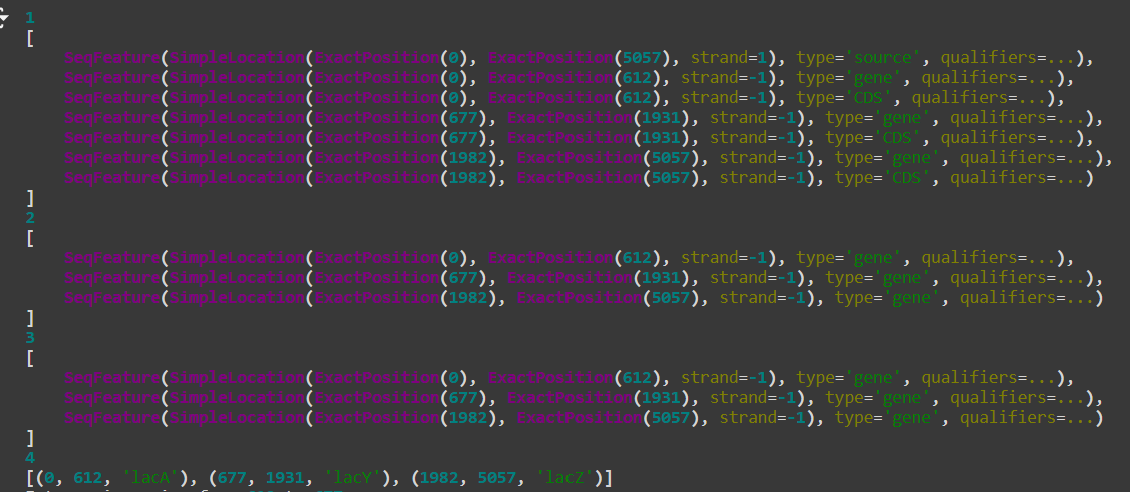